# Campus Placement

## Problem Statement:
    
    XYZ University wants to build machine learning model to know whethere student will get placed or not. So that they can provide special attention and help them to get job. Given dataset can be trated as classification or regression problem. In this project, I am going to focus on classification problem, where task is to find whethere candidate will placed or not. This is binary classification problem.

In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

## Load Dataset

In [43]:
df=pd.read_csv('Placement_Data_Full_Class.csv')
df.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    object 
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    object 
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    object 
 6   hsc_s           215 non-null    object 
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    object 
 9   workex          215 non-null    object 
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    object 
 12  mba_p           215 non-null    float64
 13  status          215 non-null    object 
 14  salary          148 non-null    float64
dtypes: float64(6), int64(1), object(8)
memory usage: 25.3+ KB


In [45]:
df.shape

(215, 15)

## EDA

In [161]:
df.isna().sum() # checking for nan values

sl_no             0
gender            0
ssc_p             0
ssc_b             0
hsc_p             0
hsc_b             0
hsc_s             0
degree_p          0
degree_t          0
workex            0
etest_p           0
specialisation    0
mba_p             0
status            0
salary            0
dtype: int64

In [48]:
df=df.fillna(0)

In [49]:
df.isna().sum()

sl_no             0
gender            0
ssc_p             0
ssc_b             0
hsc_p             0
hsc_b             0
hsc_s             0
degree_p          0
degree_t          0
workex            0
etest_p           0
specialisation    0
mba_p             0
status            0
salary            0
dtype: int64

In [47]:
df.salary.value_counts()

300000.0    22
250000.0    18
240000.0    15
260000.0     7
265000.0     6
200000.0     6
360000.0     6
220000.0     5
275000.0     5
210000.0     4
400000.0     4
270000.0     4
216000.0     3
500000.0     3
350000.0     3
204000.0     2
276000.0     2
280000.0     2
236000.0     2
230000.0     2
252000.0     2
218000.0     2
290000.0     1
940000.0     1
425000.0     1
268000.0     1
278000.0     1
450000.0     1
690000.0     1
255000.0     1
285000.0     1
295000.0     1
340000.0     1
420000.0     1
411000.0     1
336000.0     1
650000.0     1
264000.0     1
320000.0     1
380000.0     1
393000.0     1
287000.0     1
225000.0     1
233000.0     1
231000.0     1
Name: salary, dtype: int64

In [51]:
df.status.value_counts()

Placed        148
Not Placed     67
Name: status, dtype: int64

In [50]:
df.describe()

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
count,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000
mean,108.000000,67.303395,66.333163,66.370186,72.100558,62.278186,198702.325581
std,62.209324,10.827205,10.897509,7.358743,13.275956,5.833385,154780.926716
min,1.000000,40.890000,37.000000,50.000000,50.000000,51.210000,0.000000
25%,54.500000,60.600000,60.900000,61.000000,60.000000,57.945000,0.000000
50%,108.000000,67.000000,65.000000,66.000000,71.000000,62.000000,240000.000000
75%,161.500000,75.700000,73.000000,72.000000,83.500000,66.255000,282500.000000
max,215.000000,89.400000,97.700000,91.000000,98.000000,77.890000,940000.000000


<AxesSubplot:xlabel='hsc_s', ylabel='count'>

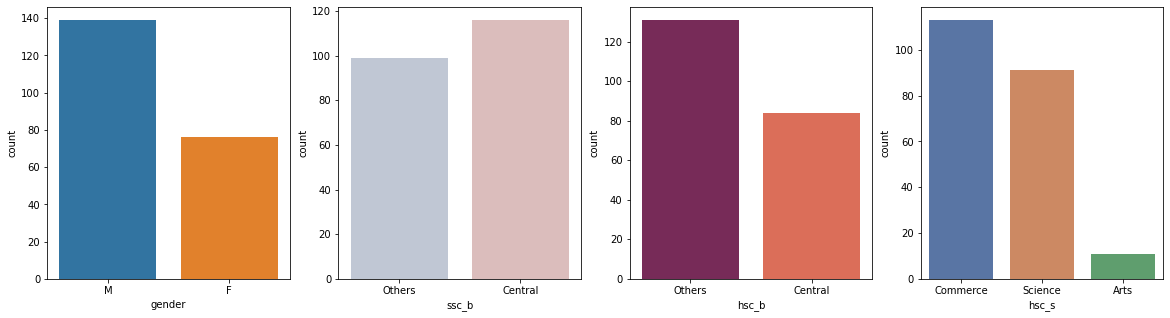

In [52]:
fig, axs = plt.subplots(ncols=4,figsize=(20,5))
sns.countplot(df['gender'], ax = axs[0])
sns.countplot(df['ssc_b'], ax = axs[1], palette="vlag")
sns.countplot(df['hsc_b'], ax = axs[2], palette="rocket")
sns.countplot(df['hsc_s'], ax = axs[3], palette="deep")

From the above chart I see that the number of male cadidates placed are higher as compared to female candidates 

<AxesSubplot:xlabel='status', ylabel='count'>

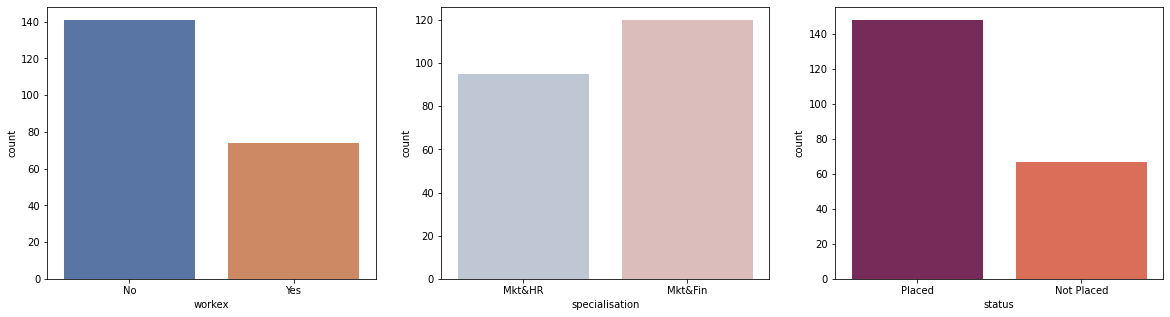

In [53]:
fig, axs = plt.subplots(ncols=3,figsize=(20,5))
sns.countplot(df['workex'], ax = axs[0], palette='deep')
sns.countplot(df['specialisation'], ax = axs[1], palette="vlag")
sns.countplot(df['status'], ax = axs[2], palette="rocket")

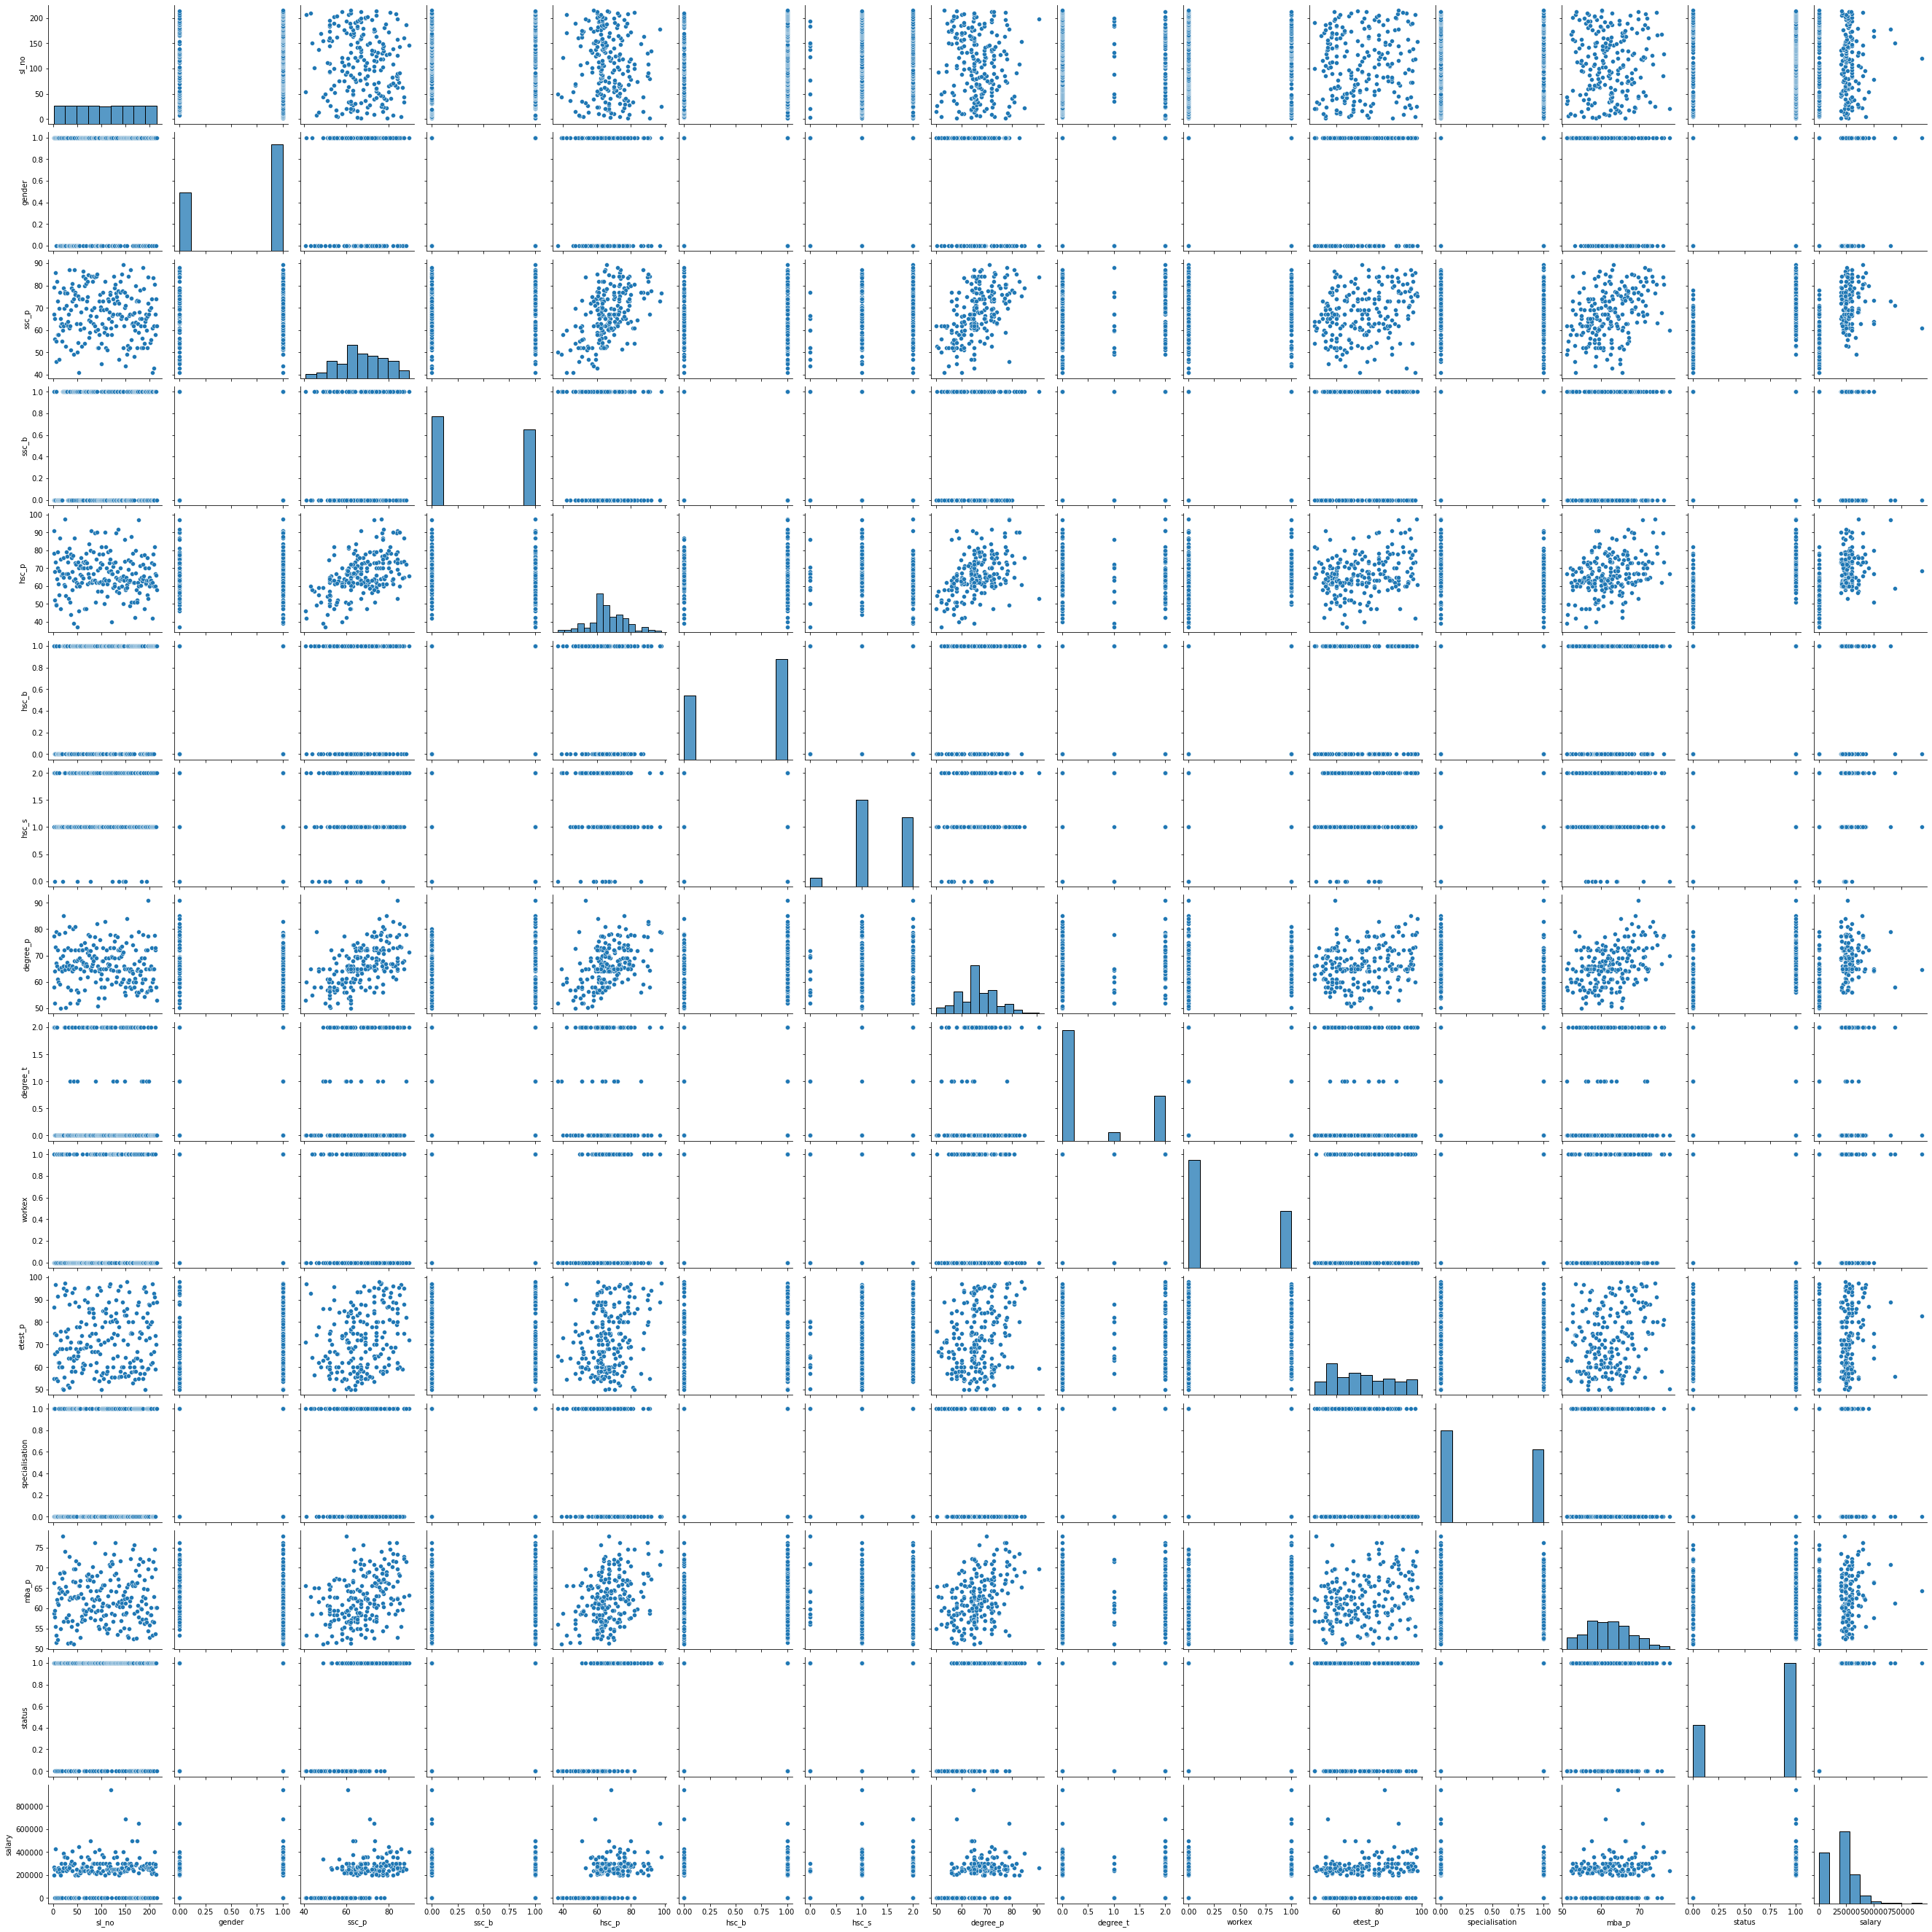

In [160]:
sns.pairplot(data=df)

<AxesSubplot:>

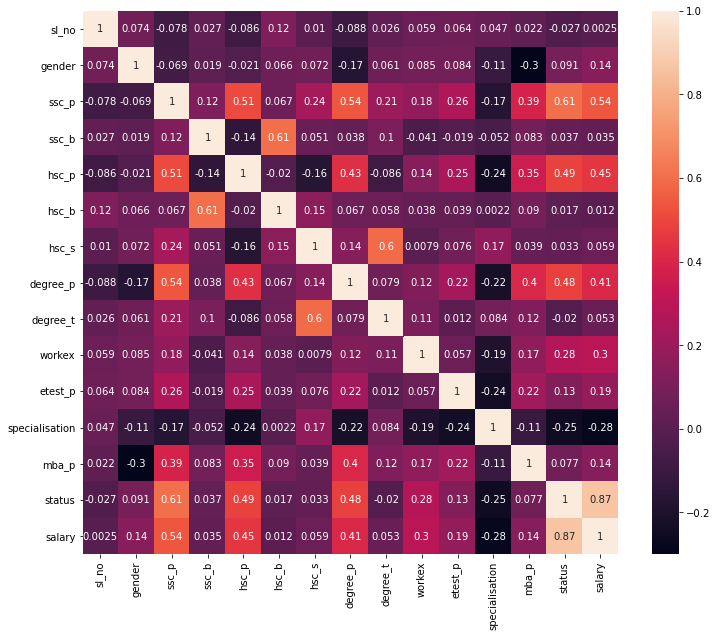

In [59]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(), annot=True)

From the above heatmap we can see that Status and Salary column are highly correlated

## Encoding

In [54]:
from sklearn.preprocessing import LabelEncoder

In [55]:
le=LabelEncoder()

In [56]:
df['gender']=le.fit_transform(df['gender'])
df['ssc_b']=le.fit_transform(df['ssc_b'])
df['hsc_b']=le.fit_transform(df['hsc_b'])
df['hsc_s']=le.fit_transform(df['hsc_s'])
df['degree_t']=le.fit_transform(df['degree_t'])
df['workex']=le.fit_transform(df['workex'])
df['specialisation']=le.fit_transform(df['specialisation'])
df['status']=le.fit_transform(df['status'])

In [57]:
df.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,1,67.00,1,91.00,1,1,58.00,2,0,55.0,1,58.80,1,270000.0
1,2,1,79.33,0,78.33,1,2,77.48,2,1,86.5,0,66.28,1,200000.0
2,3,1,65.00,0,68.00,0,0,64.00,0,0,75.0,0,57.80,1,250000.0
3,4,1,56.00,0,52.00,0,2,52.00,2,0,66.0,1,59.43,0,0.0
4,5,1,85.80,0,73.60,0,1,73.30,0,0,96.8,0,55.50,1,425000.0


<AxesSubplot:xlabel='mba_p', ylabel='Density'>

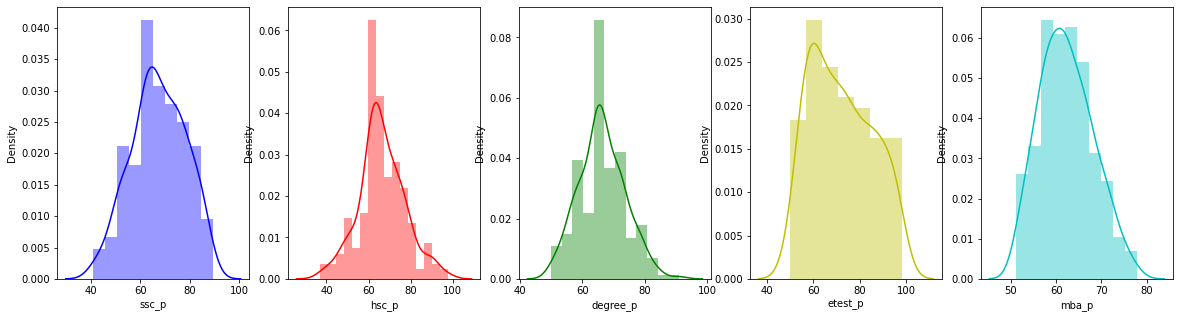

In [58]:
fig, axs = plt.subplots(ncols=5,figsize=(20,5))
sns.distplot(df['ssc_p'], ax = axs[0], color='blue')
sns.distplot(df['hsc_p'], ax = axs[1], color="red")
sns.distplot(df['degree_p'], ax = axs[2], color="green")
sns.distplot(df['etest_p'], ax = axs[3], color="y")
sns.distplot(df['mba_p'], ax = axs[4], color="c")

## Preprocessing

In [60]:
x=df.iloc[:,1:12].values
y=df.iloc[:,-2].values

In [61]:
x

array([[ 1.  , 67.  ,  1.  , ...,  0.  , 55.  ,  1.  ],
       [ 1.  , 79.33,  0.  , ...,  1.  , 86.5 ,  0.  ],
       [ 1.  , 65.  ,  0.  , ...,  0.  , 75.  ,  0.  ],
       ...,
       [ 1.  , 67.  ,  1.  , ...,  1.  , 59.  ,  0.  ],
       [ 0.  , 74.  ,  1.  , ...,  0.  , 70.  ,  1.  ],
       [ 1.  , 62.  ,  0.  , ...,  0.  , 89.  ,  1.  ]])

In [21]:
y

array([1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0])

In [143]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.20, random_state=101, stratify=y)

## Model Creation

In [144]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import classification_report, accuracy_score

In [145]:
def mymodel(model):
    model.fit(xtrain,ytrain)
    ypred=model.predict(xtest)
    print(accuracy_score(ytest,ypred))
    print(classification_report(ytest,ypred))

In [146]:
knn=KNeighborsClassifier()
logreg=LogisticRegression()
svm=SVC()
dt=DecisionTreeClassifier()

In [147]:
mymodel(knn)

0.8372093023255814
              precision    recall  f1-score   support

           0       0.88      0.54      0.67        13
           1       0.83      0.97      0.89        30

    accuracy                           0.84        43
   macro avg       0.85      0.75      0.78        43
weighted avg       0.84      0.84      0.82        43



In [148]:
mymodel(logreg)

0.8372093023255814
              precision    recall  f1-score   support

           0       0.80      0.62      0.70        13
           1       0.85      0.93      0.89        30

    accuracy                           0.84        43
   macro avg       0.82      0.77      0.79        43
weighted avg       0.83      0.84      0.83        43



In [149]:
mymodel(svm)

0.8372093023255814
              precision    recall  f1-score   support

           0       0.80      0.62      0.70        13
           1       0.85      0.93      0.89        30

    accuracy                           0.84        43
   macro avg       0.82      0.77      0.79        43
weighted avg       0.83      0.84      0.83        43



In [150]:
mymodel(dt)

0.9069767441860465
              precision    recall  f1-score   support

           0       0.91      0.77      0.83        13
           1       0.91      0.97      0.94        30

    accuracy                           0.91        43
   macro avg       0.91      0.87      0.88        43
weighted avg       0.91      0.91      0.90        43



## Hyperparameter Tuning

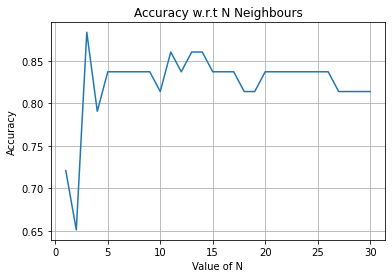

In [151]:
accuracy=[]
for i in range (1,31):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(xtrain,ytrain)
    ypred=knn.predict(xtest)
    ac=accuracy_score(ytest,ypred)
    accuracy.append(ac)
    
plt.plot(range(1,31), accuracy)
plt.title('Accuracy w.r.t N Neighbours')
plt.xlabel('Value of N')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

In [152]:
knn=KNeighborsClassifier(n_neighbors=3)
logreg=LogisticRegression(solver='lbfgs')

In [153]:
mymodel(knn)

0.8837209302325582
              precision    recall  f1-score   support

           0       1.00      0.62      0.76        13
           1       0.86      1.00      0.92        30

    accuracy                           0.88        43
   macro avg       0.93      0.81      0.84        43
weighted avg       0.90      0.88      0.87        43



In [154]:
mymodel(logreg)

0.8372093023255814
              precision    recall  f1-score   support

           0       0.80      0.62      0.70        13
           1       0.85      0.93      0.89        30

    accuracy                           0.84        43
   macro avg       0.82      0.77      0.79        43
weighted avg       0.83      0.84      0.83        43



In [155]:
for i in range(1,1000,50):
    dt1=DecisionTreeClassifier(max_depth=i)
    dt1.fit(xtrain,ytrain)
    ypred=dt1.predict(xtest)
    print(f"accuracy {i}: {accuracy_score(ytest,ypred)}")

accuracy 1: 0.7906976744186046
accuracy 51: 0.9069767441860465
accuracy 101: 0.8604651162790697
accuracy 151: 0.8837209302325582
accuracy 201: 0.8837209302325582
accuracy 251: 0.9069767441860465
accuracy 301: 0.8837209302325582
accuracy 351: 0.9069767441860465
accuracy 401: 0.8604651162790697
accuracy 451: 0.9069767441860465
accuracy 501: 0.8837209302325582
accuracy 551: 0.8837209302325582
accuracy 601: 0.9069767441860465
accuracy 651: 0.8837209302325582
accuracy 701: 0.8837209302325582
accuracy 751: 0.8837209302325582
accuracy 801: 0.8837209302325582
accuracy 851: 0.9069767441860465
accuracy 901: 0.8837209302325582
accuracy 951: 0.8604651162790697


In [156]:
for i in range(1,1000,50):
    dt2=DecisionTreeClassifier(min_samples_leaf=i)
    dt2.fit(xtrain,ytrain)
    ypred=dt2.predict(xtest)
    print(f"accuracy {i}: {accuracy_score(ytest,ypred)}")

accuracy 1: 0.8837209302325582
accuracy 51: 0.7441860465116279
accuracy 101: 0.6976744186046512
accuracy 151: 0.6976744186046512
accuracy 201: 0.6976744186046512
accuracy 251: 0.6976744186046512
accuracy 301: 0.6976744186046512
accuracy 351: 0.6976744186046512
accuracy 401: 0.6976744186046512
accuracy 451: 0.6976744186046512
accuracy 501: 0.6976744186046512
accuracy 551: 0.6976744186046512
accuracy 601: 0.6976744186046512
accuracy 651: 0.6976744186046512
accuracy 701: 0.6976744186046512
accuracy 751: 0.6976744186046512
accuracy 801: 0.6976744186046512
accuracy 851: 0.6976744186046512
accuracy 901: 0.6976744186046512
accuracy 951: 0.6976744186046512


In [157]:
dt3=DecisionTreeClassifier(max_depth=51)
mymodel(dt3)

0.9069767441860465
              precision    recall  f1-score   support

           0       0.91      0.77      0.83        13
           1       0.91      0.97      0.94        30

    accuracy                           0.91        43
   macro avg       0.91      0.87      0.88        43
weighted avg       0.91      0.91      0.90        43

